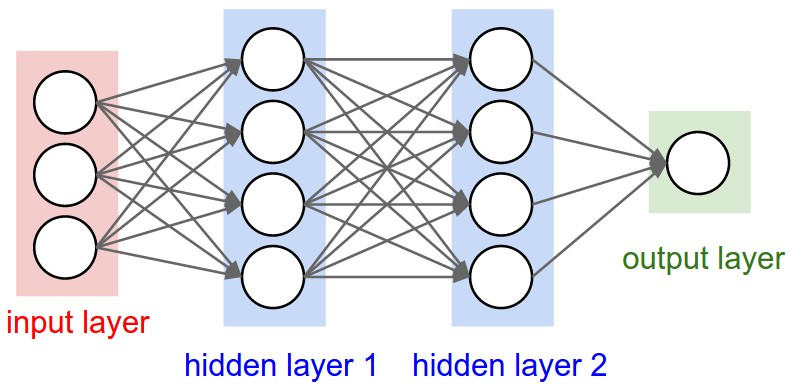

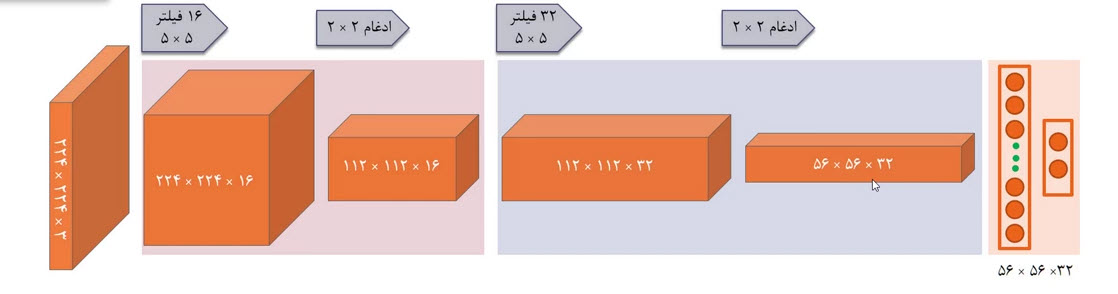

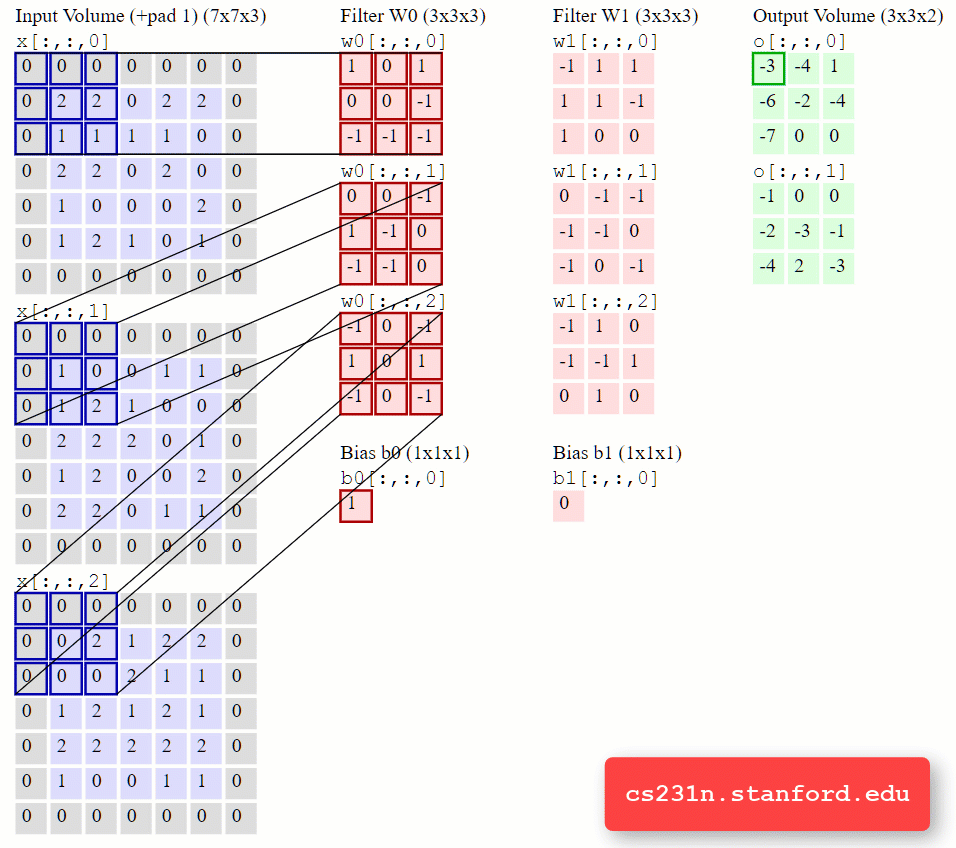

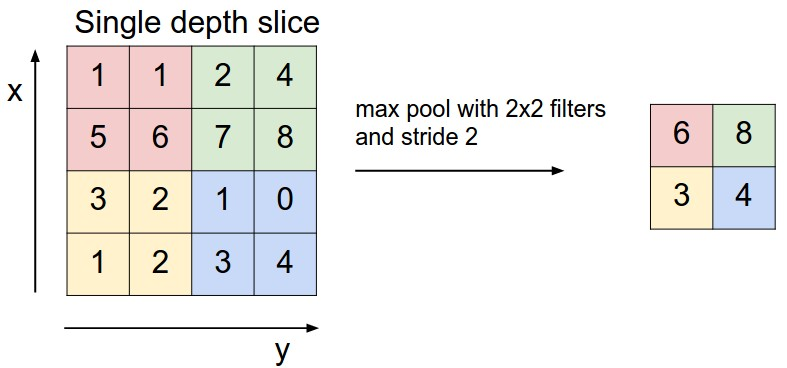

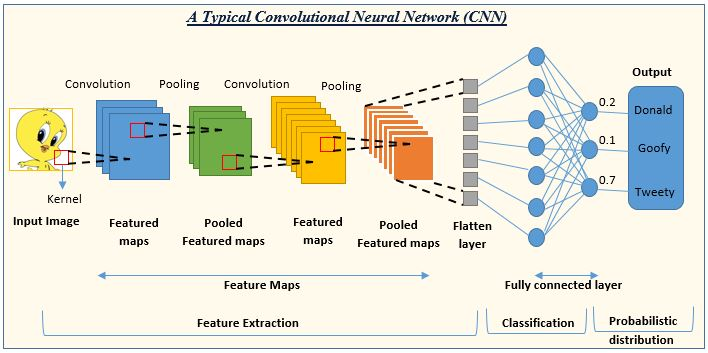

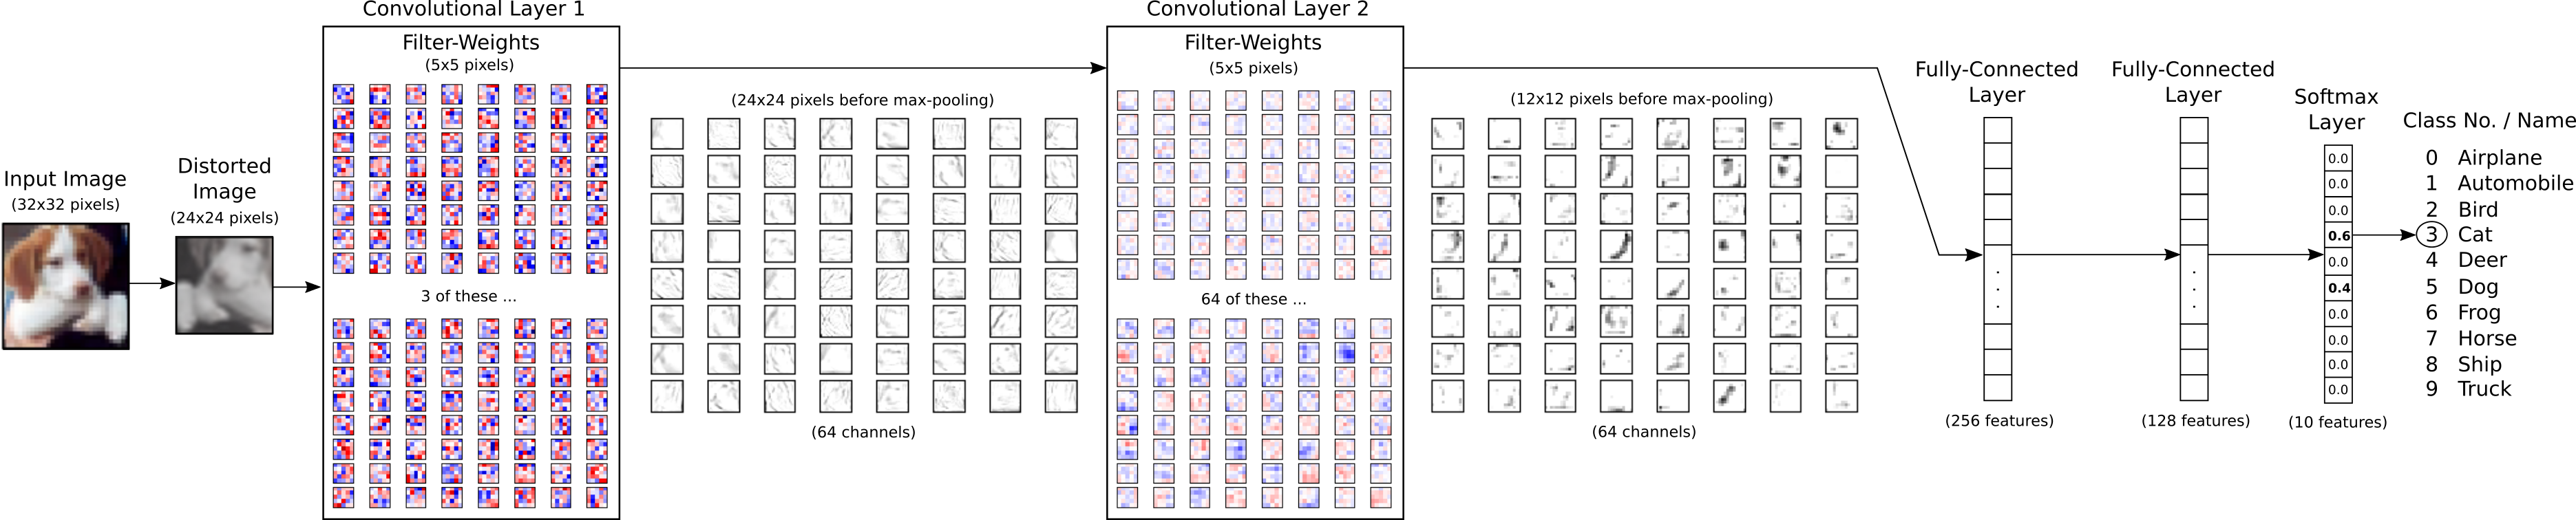

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Data

In [5]:
sz=224
transform=transforms.Compose([
    transforms.Resize((sz,sz)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
   
    ])

In [6]:
train_ds=dataset.ImageFolder(root='D:/DataSets/classification/cat_Vs_Dog/PetImages/dev/train',transform=transform)
test_ds=dataset.ImageFolder(root='D:/DataSets/classification/cat_Vs_Dog/PetImages/dev/valid',transform=transform)


In [7]:
batch_size=32
train_dl=DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=True,num_workers=2)
test_dl=DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=True,num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

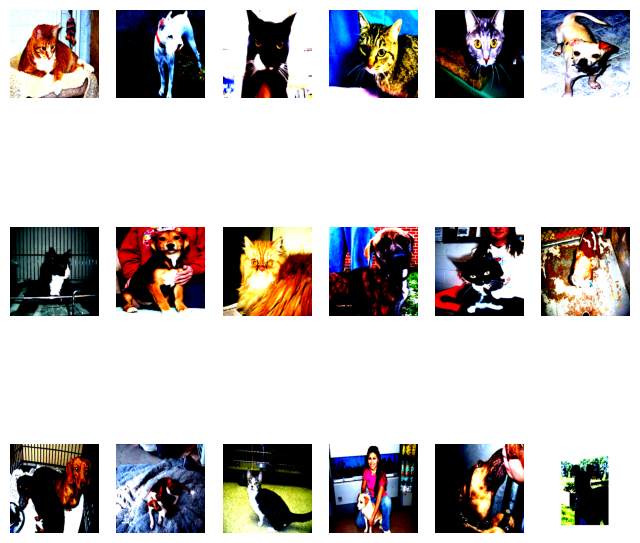

In [8]:
image,target=next(iter(train_dl))
plt.figure(figsize=(8,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    img=torch.transpose(image[i],0,1)
    img=torch.transpose(img,1,2)
    plt.imshow(img)
    plt.axis('off')
plt.show()  

# Model

In [74]:
class CNN(nn.Module):
    def __init__(self,input_channel=3,num_class=10):
        super(CNN,self).__init__()
        self.Conv=nn.Sequential(
            nn.Conv2d(3,16,3,1,1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16,32,3,1,1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
          )
        
        self.Classifier=nn.Sequential(
            nn.Linear(56*56*32,100),
            nn.ReLU(),
            nn.Dropout(.3),
            nn.Linear(100,num_class)
            
        )
        
    def forward(self,x):
        out=self.Conv(x)
        out=out.flatten(1)
        out=self.Classifier(out)
        return out
        
        
        

In [75]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [76]:
model=CNN().to(device)

# loss Function


In [77]:
citerion=nn.CrossEntropyLoss()


# optimizer

In [79]:
optimizer=optim.SGD(params=model.parameters(),lr=0.001)

# train

In [80]:
epoch=6

In [81]:
for i in range(epoch):
    sumLoss=0
    for idx,(image,target) in enumerate(train_dl):
        
        image=image.to(device)
        target=target.to(device)
        
        optimizer.zero_grad()
        
        score=model(image)
        loss=citerion(score,target)
        
        sumLoss+=loss
        
        loss.backward()
        
        optimizer.step()
        
    print(f'in epoch number {i+1} is equal to { sumLoss }')
           
        

in epoch number 1 is equal to 94.84417724609375
in epoch number 2 is equal to 79.21673583984375
in epoch number 3 is equal to 74.09204864501953
in epoch number 4 is equal to 69.56277465820312
in epoch number 5 is equal to 65.54107666015625
in epoch number 6 is equal to 63.3486213684082


In [23]:
def check_accuracy(dataloader,model):
     
    num_correct=0
    all_sample=0
    
    model.eval()
    
    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)
            
            score=model(x)
            _,pred=score.max(1)
            
            num_correct+=(pred==y).sum()
            all_sample+=len(y)
    
    print(f'accuracy is { num_correct/all_sample }')


In [83]:
check_accuracy(train_dl,model)

accuracy is 0.8181591033935547


In [82]:
check_accuracy(test_dl,model)

accuracy is 0.7070000171661377


In [107]:
h0 = torch.randn(2, 5, 30)

In [108]:
h0.shape

torch.Size([2, 5, 30])

In [109]:
input = torch.randn(5, 10, 10)

In [110]:
rnn = nn.RNN(10, 30, 2,batch_first=True)

In [111]:
output, hn = rnn(input, h0)

In [113]:
output.shape

torch.Size([5, 10, 30])

In [114]:
hn.shape

torch.Size([2, 5, 30])